In [2]:
from IPython.display import Image

# Description
Random Forest Classifiers are very powerful machine learning tools for image segmentation. The most famous example of it is the very popular open source software [Ilastik](https://www.ilastik.org/). There are also popular napari plugins to perform this tasks in napari, such as [napari-apoc](https://github.com/haesleinhuepf/napari-accelerated-pixel-and-object-classification) by Robert Haase. 

The first step for each machine learning process is the **extraction of some features** that are later used in the random forest for the classification of each pixel. This features are extracted by applying filters on the images at different scales and extracting information such as pixel color, intensity, texture, edge properties etc. Usually the users has to setup the number of features to be extracted and this step will determine the computational power needed.

The innovation in convpaint is the use of **pretrained neural networks**, such as convolutional neural networks (CNN) or vision transformers (ViT) to extract those features. In particular, we implemented for example VGG16, a CNN which was trained on ImageNet, an image dataset containing millions of annotated images.
 Therefore the name "conv" for convolutional and "paint" because the user has to provide sparse annotation in order for the model to be trained. One advantage of this approach is that the user has no longer to pre-determine the mathematical operations (filters) that will be computed to extract the features. In fact, sometimes the user doesn't have the knowledge to decide which and how many are the most important features, or it would need a long and tedious study to determine that. Instead we let the model decide what are the most important features based on its training on a huge amount of images.

This process is illustrated in this schema:

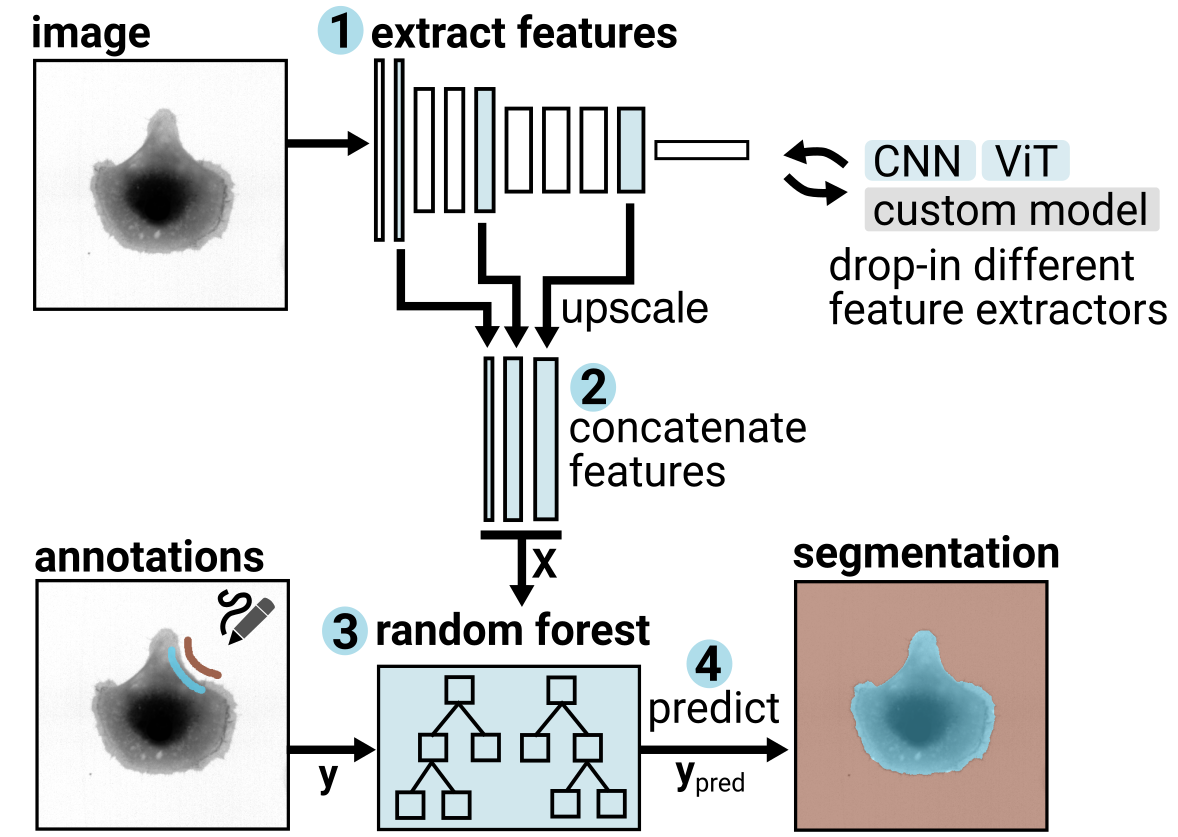

In [5]:
Image('../images/architecture.png')

Per default the plugin uses VGG16, but other networks are available like DINOv2 that works well for images and movies of animals.

The advantage of using convpaint instead of the neural network itself is the computational power needed. In fact, running the entire model will be very computationally heavy and in most cases it is not necessary for the classical image segmentation tasks that are the base of each image analysis workflow. Therefore we use the model only to extract features and later we run a random forest classifier **which makes this plugin very fast**. In this way we have built a very powerful and stable segmentation tool, which **can be easily added to any workflow**.

Another advantage is that the features extracted from pretrained neural networks extract more information from the data, and lead to **better segmentation results**, especially on complex data.

We spent a lot of effort quantifying the performance gains of different feature extractors on different datasets, please check the paper if you are interested. Here is an example of a histology dataset:

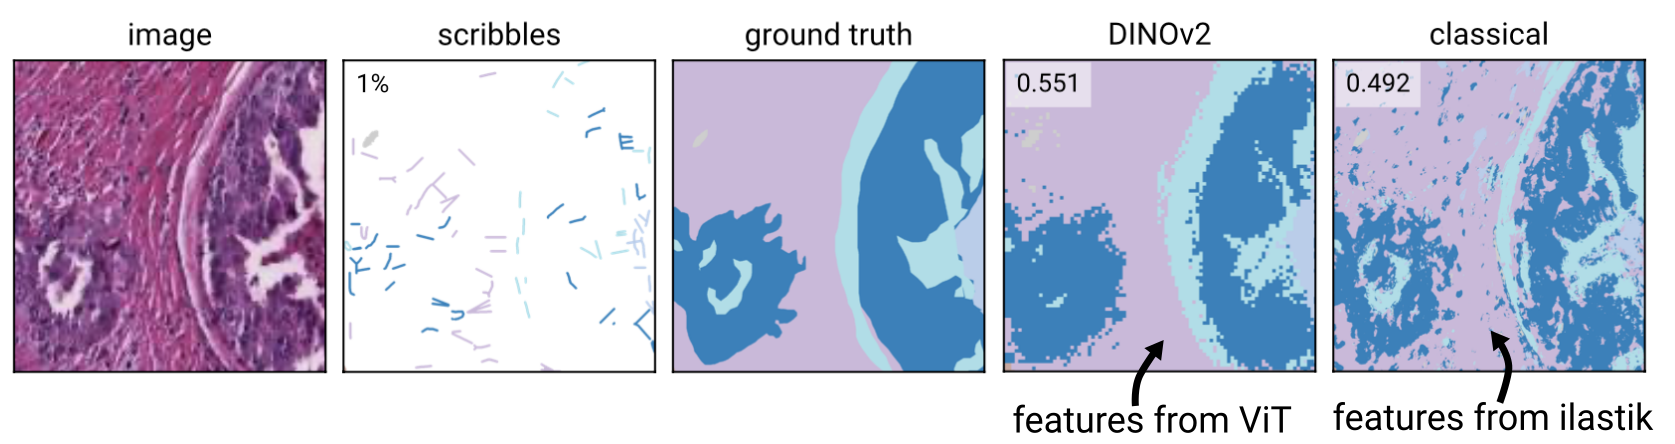

In [7]:
Image('../images/histo_sample.png')